In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col


household_df = pd.read_excel("UN Food Waste Index Source and Worksheet.xlsx", sheet_name="Household Estimates")

food_service_df = pd.read_excel("UN Food Waste Index Source and Worksheet.xlsx", sheet_name="Food Service Estimates")

retail_df = pd.read_excel("UN Food Waste Index Source and Worksheet.xlsx", sheet_name="Retail Estimates")

In [2]:
household_df.columns

Index(['Region', 'M49 code', 'Country', 'ISO-alpha3 code',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Confidence in estimate',
       '2020 Population', 'Access to Electricity CC',
       '2020 GDP (2015 Constant)', 'GDP Per Capita (2015 Constant)',
       'Tourism Receipts (Current USD$)', 'Tourism % GDP ',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Rural population', 'Food Production Index',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Population density (people per sq. km of land area)'],
      dtype='object')

In [3]:
household_df_with_two_columns = household_df[['GDP Per Capita (2015 Constant)', "Household estimate (kg/capita/year)"]].dropna(axis=0)
# household_df_with_two_columns

In [4]:
x_vars = 'GDP Per Capita (2015 Constant)'
X = household_df_with_two_columns[x_vars]
y_var = "Household estimate (kg/capita/year)"
x1_modified=sm.add_constant(X)
model_household = sm.OLS(household_df_with_two_columns[y_var], x1_modified).fit()
print(model_household.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Household estimate (kg/capita/year)   R-squared:                       0.069
Model:                                             OLS   Adj. R-squared:                  0.065
Method:                                  Least Squares   F-statistic:                     14.78
Date:                                 Mon, 19 Dec 2022   Prob (F-statistic):           0.000163
Time:                                         14:01:52   Log-Likelihood:                -860.88
No. Observations:                                  200   AIC:                             1726.
Df Residuals:                                      198   BIC:                             1732.
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                                     coe

In [5]:
household_df_with_two_columns = household_df[['GDP Per Capita (2015 Constant)', "Household estimate (kg/capita/year)"]].dropna(axis=0)
# household_df_with_two_columns

<Figure size 1500x800 with 0 Axes>

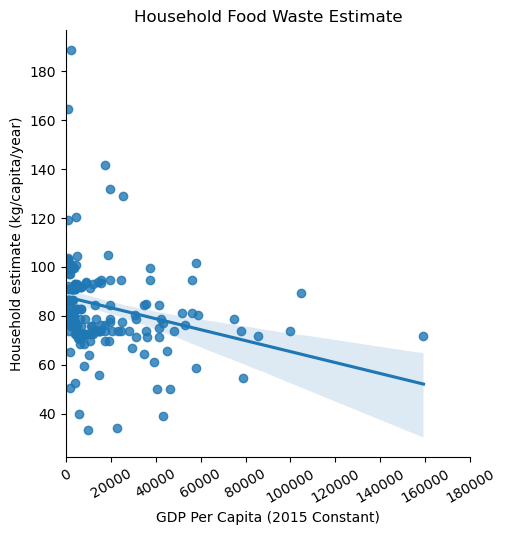

In [6]:
plt.figure(figsize = (15,8))
ax = sns.lmplot(x = x_vars,y = y_var,data=household_df_with_two_columns)
ax.set_xticklabels(rotation = 30, size = 10)
ax.set(xlim = (0, None), title = 'Household Food Waste Estimate')

In [7]:
household_df.columns

Index(['Region', 'M49 code', 'Country', 'ISO-alpha3 code',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Confidence in estimate',
       '2020 Population', 'Access to Electricity CC',
       '2020 GDP (2015 Constant)', 'GDP Per Capita (2015 Constant)',
       'Tourism Receipts (Current USD$)', 'Tourism % GDP ',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Rural population', 'Food Production Index',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Population density (people per sq. km of land area)'],
      dtype='object')

In [8]:
household_df = household_df.dropna()

y_var = "Household estimate (kg/capita/year)"

x_vars = [
    "Access to Electricity CC",
    "2020 GDP (2015 Constant)",
    "Tourism Receipts (Current USD$)",
    '2020 Population',
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Rural population',
'Food Production Index',
'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    'Electric power consumption (kWh per capita)',
'Population density (people per sq. km of land area)'
]

##Per Capita X Vars (for testing purposes)
# x_vars = [
#     "Access to Electricity CC",
#     "GDP Per Capita (2015 Constant)",
#     "Tourism % GDP "]


### Trying to remove all rows with zero values
# # household_df[x_vars]
# household_df[household_df[x_vars]!= 0]
# household_X = household_df[x_vars].dropna()
# # household_X[household_X[x_vars] != 0]
# # household_df[x_vars].dropna()
# household_X = household_X.loc[(household_X!=0.00).all(axis=1)]
# # print(household_X)

# household_df["2020 GDP (2015 Constant)"] = ((household_df["2020 GDP (2015 Constant)"]-household_df["2020 GDP (2015 Constant)"].mean())/(household_df["2020 GDP (2015 Constant)"].max()-household_df["2020 GDP (2015 Constant)"].min()))
# household_df["Tourism Receipts (Current USD$)"] = ((household_df["Tourism Receipts (Current USD$)"]-household_df["Tourism Receipts (Current USD$)"].mean())/(household_df["Tourism Receipts (Current USD$)"].max()-household_df["Tourism Receipts (Current USD$)"].min()))
# ##household_df["2020 GDP (2015 Constant)"]-household_df["2020 GDP (2015 Constant)"].mean())/(household_df["2020 GDP (2015 Constant)"].max()-household_df["2020 GDP (2015 Constant)"].min()))

# X = household_df[x_vars]
# x_modified=sm.add_constant(X)
# model_household = sm.OLS(household_df[y_var], x_modified).fit()

household_df[x_vars]


,Access to Electricity CC,2020 GDP (2015 Constant),Tourism Receipts (Current USD$),2020 Population,"Agriculture, forestry, and fishing, value added (% of GDP)",Rural population,Food Production Index,Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Electric power consumption (kWh per capita),Population density (people per sq. km of land area)
0,100.0,2.062195e+10,5.000000e+07,38928341.0,25.773971,28796851.0,118.04,0.000000,0.000000,0.000000,59.684990
1,100.0,1.251621e+10,2.306000e+09,2837849.0,18.389347,1075204.0,105.66,45.236191,31.304270,2309.366503,103.571131
2,100.0,1.681440e+11,1.965000e+08,43851043.0,12.336212,11518353.0,112.50,32.204341,22.713462,1362.871884,18.411340
3,100.0,6.534779e+08,0.000000e+00,55197.0,0.000000,7091.0,0.00,103.599374,61.574074,0.000000,275.985000
4,100.0,2.672446e+09,0.000000e+00,77265.0,0.522633,9337.0,0.00,0.000000,0.000000,0.000000,164.393617
...,...,...,...,...,...,...,...,...,...,...,...
209,100.0,8.175021e+08,3.250000e+08,307150.0,0.000000,228750.0,89.79,65.796054,50.345277,0.000000,25.196883
211,100.0,3.227750e+11,1.008000e+10,97338583.0,0.000000,60992356.0,106.04,0.000000,0.000000,1423.699910,310.560232
212,100.0,3.413334e+10,0.000000e+00,29825968.0,5.000962,18519540.0,104.61,43.246924,7.135395,219.799897,56.491786
213,100.0,2.341895e+10,0.000000e+00,18383956.0,2.860775,10179380.0,122.43,36.930965,34.636193,717.347305,24.729894


In [9]:
household_df["2020 GDP (2015 Constant)"] = ((household_df["2020 GDP (2015 Constant)"]-household_df["2020 GDP (2015 Constant)"].mean())/(household_df["2020 GDP (2015 Constant)"].max()-household_df["2020 GDP (2015 Constant)"].min()))
household_df["Tourism Receipts (Current USD$)"] = ((household_df["Tourism Receipts (Current USD$)"]-household_df["Tourism Receipts (Current USD$)"].mean())/(household_df["Tourism Receipts (Current USD$)"].max()-household_df["Tourism Receipts (Current USD$)"].min()))
std_pop = household_df["2020 Population"].std()
household_df["2020 Population"] = (household_df["2020 Population"] - household_df["2020 Population"].mean()) / std_pop
std_rurpop = household_df["Rural population"].std()
household_df["Rural population"] = (household_df["Rural population"] - household_df["Rural population"].mean()) / std_rurpop

household_df[x_vars]



,Access to Electricity CC,2020 GDP (2015 Constant),Tourism Receipts (Current USD$),2020 Population,"Agriculture, forestry, and fishing, value added (% of GDP)",Rural population,Food Production Index,Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Electric power consumption (kWh per capita),Population density (people per sq. km of land area)
0,100.0,-0.019934,-0.028807,0.004858,25.773971,0.158061,118.04,0.000000,0.000000,0.000000,59.684990
1,100.0,-0.020355,-0.019484,-0.244861,18.389347,-0.207565,105.66,45.236191,31.304270,2309.366503,103.571131
2,100.0,-0.012269,-0.028202,0.038919,12.336212,-0.069828,112.50,32.204341,22.713462,1362.871884,18.411340
3,100.0,-0.020971,-0.029014,-0.264115,0.000000,-0.221653,0.00,103.599374,61.574074,0.000000,275.985000
4,100.0,-0.020866,-0.029014,-0.263962,0.522633,-0.221623,0.00,0.000000,0.000000,0.000000,164.393617
...,...,...,...,...,...,...,...,...,...,...,...
209,100.0,-0.020963,-0.027671,-0.262372,0.000000,-0.218729,89.79,65.796054,50.345277,0.000000,25.196883
211,100.0,-0.004235,0.012642,0.409013,0.000000,0.582694,106.04,0.000000,0.000000,1423.699910,310.560232
212,100.0,-0.019232,-0.029014,-0.058124,5.000962,0.022512,104.61,43.246924,7.135395,219.799897,56.491786
213,100.0,-0.019788,-0.029014,-0.137294,2.860775,-0.087488,122.43,36.930965,34.636193,717.347305,24.729894


In [10]:

X = household_df[x_vars]
x_modified=sm.add_constant(X)
model_household = sm.OLS(household_df[y_var], x_modified).fit()


# # # Get the coefficients, p-values, and standard errors & odds ratio
# # coefs = model_household.params
# # p_values = model_household.pvalues
# # std_errors = model_household.bse


# # # Print the results in a table
# # table_household = pd.DataFrame({
# #     'Variable': x_modified.columns,
# #     'Coefficient': coefs,
# #     'p-value': p_values,
# #     'Standard Error': std_errors,
    
# # })


# ## Print the table dataframe
# # print(table_household)

# ## Write the table dataframe to a CSV file
# # table_household.to_csv('Household table.csv')

## Print Summary Statistics

print(y_var)
print(model_household.summary())

##Print Confidence Interval
# print(model_household.conf_int(alpha=0.05, cols=None))

# # Calculate the correlation matrix
# corr_matrix = x_modified.corr()

# # Print the correlation matrix
# # print(corr_matrix)


# # ##Write the dataframe to a CSV file
# # corr_matrix.to_csv('Household corr_matrix.csv')





Household estimate (kg/capita/year)
                                     OLS Regression Results                                    
Dep. Variable:     Household estimate (kg/capita/year)   R-squared:                       0.196
Model:                                             OLS   Adj. R-squared:                  0.149
Method:                                  Least Squares   F-statistic:                     4.159
Date:                                 Mon, 19 Dec 2022   Prob (F-statistic):           1.68e-05
Time:                                         14:01:52   Log-Likelihood:                -846.30
No. Observations:                                  200   AIC:                             1717.
Df Residuals:                                      188   BIC:                             1756.
Df Model:                                           11                                         
Covariance Type:                             nonrobust                                         
    

In [11]:
food_service_df.columns

Index(['Region', 'M49 code', 'Country', 'Country Code',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       '2020 Population', '2020 Access to Electricity CC',
       '2020 GDP (2015 Constant)', 'GDP Per Capita (2015 Constant)',
       'Tourism Receipts (Current USD)', 'Tourism % GDP ',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Rural population', 'Food Production Index',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Population density (people per sq. km of land area)'],
      dtype='object')

In [12]:
food_service_df_with_two_columns = food_service_df[['GDP Per Capita (2015 Constant)', "Food service estimate (kg/capita/year)"]].dropna(axis=0)
food_service_df_with_two_columns.dropna()

,GDP Per Capita (2015 Constant),Food service estimate (kg/capita/year)
0,529.741210,27.648075
1,4410.455165,27.648075
2,3834.435591,27.648075
3,11839.010501,27.648075
4,34588.053724,25.570418
...,...,...
209,2661.572764,27.648075
211,3316.002658,27.648075
212,1144.416671,27.648075
213,1273.879558,27.648075


In [13]:
x_vars = 'GDP Per Capita (2015 Constant)'
X = food_service_df_with_two_columns[x_vars]
y_var = "Food service estimate (kg/capita/year)"
x1_modified=sm.add_constant(X)
model_household = sm.OLS(food_service_df_with_two_columns[y_var], x1_modified).fit()
# print(model_household.summary())

<Figure size 1500x800 with 0 Axes>

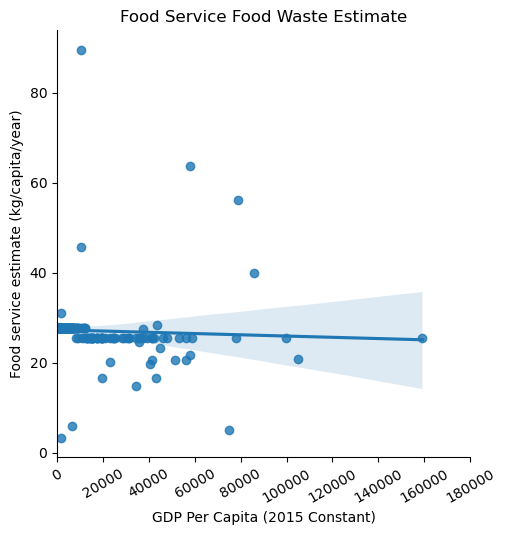

In [14]:
plt.figure(figsize = (15,8))
ax = sns.lmplot(x = x_vars,y = y_var,data=food_service_df_with_two_columns)
ax.set_xticklabels(rotation = 30, size = 10)
ax.set(xlim = (0, None), title = 'Food Service Food Waste Estimate')


In [15]:
food_service_df = food_service_df.dropna()
food_service_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            204, 205, 206, 207, 208, 209, 211, 212, 213, 214],
           dtype='int64', length=199)

In [16]:
y_var = "Food service estimate (kg/capita/year)"


x_vars = [
    "2020 Access to Electricity CC",
    "2020 GDP (2015 Constant)",
    "Tourism Receipts (Current USD)",
    'Agriculture, forestry, and fishing, value added (% of GDP)',
'Rural population',
'Food Production Index',
'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    'Electric power consumption (kWh per capita)',
'Population density (people per sq. km of land area)'
]







In [17]:
food_service_df[x_vars]

,2020 Access to Electricity CC,2020 GDP (2015 Constant),Tourism Receipts (Current USD),"Agriculture, forestry, and fishing, value added (% of GDP)",Rural population,Food Production Index,Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Electric power consumption (kWh per capita),Population density (people per sq. km of land area)
0,100.0,2.062195e+10,5.000000e+07,25.773971,28796851.0,118.04,0.000000,0.000000,0.000000,59.684990
1,100.0,1.251621e+10,2.306000e+09,18.389347,1075204.0,105.66,45.236191,31.304270,2309.366503,103.571131
2,100.0,1.681440e+11,1.965000e+08,12.336212,11518353.0,112.50,32.204341,22.713462,1362.871884,18.411340
3,100.0,6.534779e+08,0.000000e+00,0.000000,7091.0,0.00,103.599374,61.574074,0.000000,275.985000
4,100.0,2.672446e+09,0.000000e+00,0.522633,9337.0,0.00,0.000000,0.000000,0.000000,164.393617
...,...,...,...,...,...,...,...,...,...,...
209,100.0,8.175021e+08,3.250000e+08,0.000000,228750.0,89.79,65.796054,50.345277,0.000000,25.196883
211,100.0,3.227750e+11,1.008000e+10,0.000000,60992356.0,106.04,0.000000,0.000000,1423.699910,310.560232
212,100.0,3.413334e+10,0.000000e+00,5.000962,18519540.0,104.61,43.246924,7.135395,219.799897,56.491786
213,100.0,2.341895e+10,0.000000e+00,2.860775,10179380.0,122.43,36.930965,34.636193,717.347305,24.729894


In [18]:

# x_vars = [
#     "2020 Access to Electricity CC",
#     "GDP Per Capita (2015 Constant)",
#     "Tourism % GDP "]

# Use below if you need to normalize
food_service_df["2020 GDP (2015 Constant)"] = ((food_service_df["2020 GDP (2015 Constant)"]-food_service_df["2020 GDP (2015 Constant)"].mean())/(food_service_df["2020 GDP (2015 Constant)"].max()-food_service_df["2020 GDP (2015 Constant)"].min()))
food_service_df["Tourism Receipts (Current USD)"] = ((food_service_df["Tourism Receipts (Current USD)"]-food_service_df["Tourism Receipts (Current USD)"].mean())/(food_service_df["Tourism Receipts (Current USD)"].max()-food_service_df["Tourism Receipts (Current USD)"].min()))

std_pop2 = food_service_df["2020 Population"].std()
food_service_df["2020 Population"] = (food_service_df["2020 Population"] - food_service_df["2020 Population"].mean()) / std_pop2
std_rurpop2 = food_service_df["Rural population"].std()
food_service_df["Rural population"] = (food_service_df["Rural population"] - food_service_df["Rural population"].mean()) / std_rurpop2

food_service_df[x_vars]





,2020 Access to Electricity CC,2020 GDP (2015 Constant),Tourism Receipts (Current USD),"Agriculture, forestry, and fishing, value added (% of GDP)",Rural population,Food Production Index,Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),Electric power consumption (kWh per capita),Population density (people per sq. km of land area)
0,100.0,-0.020037,-0.028953,25.773971,0.156952,118.04,0.000000,0.000000,0.000000,59.684990
1,100.0,-0.020458,-0.019630,18.389347,-0.207769,105.66,45.236191,31.304270,2309.366503,103.571131
2,100.0,-0.012372,-0.028348,12.336212,-0.070374,112.50,32.204341,22.713462,1362.871884,18.411340
3,100.0,-0.021074,-0.029160,0.000000,-0.221822,0.00,103.599374,61.574074,0.000000,275.985000
4,100.0,-0.020969,-0.029160,0.522633,-0.221792,0.00,0.000000,0.000000,0.000000,164.393617
...,...,...,...,...,...,...,...,...,...,...
209,100.0,-0.021066,-0.027817,0.000000,-0.218906,89.79,65.796054,50.345277,0.000000,25.196883
211,100.0,-0.004338,0.012496,0.000000,0.580533,106.04,0.000000,0.000000,1423.699910,310.560232
212,100.0,-0.019335,-0.029160,5.000962,0.021738,104.61,43.246924,7.135395,219.799897,56.491786
213,100.0,-0.019891,-0.029160,2.860775,-0.087990,122.43,36.930965,34.636193,717.347305,24.729894


In [19]:
X = food_service_df[x_vars]
x_modified=sm.add_constant(X)
model_food_service = sm.OLS(food_service_df[y_var],x_modified).fit()

# # Get the coefficients, p-values, and standard errors
# coefs = model_food_service.params
# p_values = model_food_service.pvalues
# std_errors = model_food_service.bse

# # Print the results in a table
# table_food_service = pd.DataFrame({
#     'Variable': x_modified.columns,
#     'Coefficient': coefs,
#     'p-value': p_values,
#     'Standard Error': std_errors
# })

# # Print the table
# print(table_food_service)
# # Write the dataframe to a CSV file
# table_food_service.to_csv('Table Food Service.csv')

##Print the confidence interval
# print(model_food_service.conf_int(alpha=0.05, cols=None))

##Print Food Service Summary Statistics
print(y_var)
print(model_food_service.summary())

# Calculate the correlation matrix
# corr_matrix = x_modified.corr()

# # Print the correlation matrix
# print(corr_matrix)

##Write the dataframe to a CSV file
# corr_matrix.to_csv('food service corr_matrix.csv')

Food service estimate (kg/capita/year)
                                      OLS Regression Results                                      
Dep. Variable:     Food service estimate (kg/capita/year)   R-squared:                       0.162
Model:                                                OLS   Adj. R-squared:                  0.117
Method:                                     Least Squares   F-statistic:                     3.635
Date:                                    Mon, 19 Dec 2022   Prob (F-statistic):           0.000190
Time:                                            14:01:53   Log-Likelihood:                -643.65
No. Observations:                                     199   AIC:                             1309.
Df Residuals:                                         188   BIC:                             1346.
Df Model:                                              10                                         
Covariance Type:                                nonrobust             

In [20]:
# Convert the summary statistics to a Pandas DataFrame
food_service_summary_df = summary_col(results=[model_food_service], float_format='%0.4f', stars=True, info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                                 'R2':lambda x: "{:.2f}".format(x.rsquared)})
# Flatten the multi-indexed DataFrame
latex_str = food_service_summary_df.as_latex()
summary_food_serice_df = pd.read_latex(latex_str)

# Write the DataFrame to an Excel file
food_service_summary_df.to_excel('food_service_summary_stats.xlsx', index=False)


AttributeError: module 'pandas' has no attribute 'read_latex'

In [ ]:
retail_df.columns

In [ ]:
retail_df_with_two_columns = retail_df[['GDP Per Capita (2015 Constant)', "Retail estimate (kg/capita/year)"]].dropna(axis=0)
# retail_df_with_two_columns

In [ ]:
x_vars = 'GDP Per Capita (2015 Constant)'
X = retail_df_with_two_columns[x_vars]
y_var = "Retail estimate (kg/capita/year)"
x1_modified=sm.add_constant(X)
model_household = sm.OLS(retail_df_with_two_columns[y_var], x1_modified).fit()
print(model_household.summary())

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lmplot(x = x_vars,y = y_var,data=retail_df_with_two_columns)
ax.set_xticklabels(rotation = 30, size = 10)
ax.set(xlim = (0, None), title = 'Retail Food Waste Estimate')

In [ ]:
retail_df = retail_df.dropna()
retail_df.columns

In [ ]:
y_var = "Retail estimate (kg/capita/year)"

x_vars = [
    "2020 Access to Electricity CC",
    "2020 GDP (2015 Constant)",
    "Tourism Receipts (Current USD$)",
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Rural population',
'Food Production Index',
'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    'Electric power consumption (kWh per capita)',
'Population density (people per sq. km of land area)'
]

retail_df[x_vars].dropna()


In [ ]:
# x_vars = [
#     "2020 Access to Electricity CC",
#     "GDP Per Capita (2015 Constant)",
#     "Tourism % GDP "]

#Use below if you need to normalize
retail_df["2020 GDP (2015 Constant)"] = ((retail_df["2020 GDP (2015 Constant)"]-retail_df["2020 GDP (2015 Constant)"].mean())/(retail_df["2020 GDP (2015 Constant)"].max()-retail_df["2020 GDP (2015 Constant)"].min()))
retail_df["Tourism Receipts (Current USD$)"] = ((retail_df["Tourism Receipts (Current USD$)"]-retail_df["Tourism Receipts (Current USD$)"].mean())/(retail_df["Tourism Receipts (Current USD$)"].max()-retail_df["Tourism Receipts (Current USD$)"].min()))

std_pop3 = retail_df["2020 Population"].std()
retail_df["2020 Population"] = (retail_df["2020 Population"] - retail_df["2020 Population"].mean()) / std_pop3
std_rurpop3 = retail_df["Rural population"].std()
retail_df["Rural population"] = (retail_df["Rural population"] - retail_df["Rural population"].mean()) / std_rurpop3

retail_df[x_vars]


In [ ]:


X = retail_df[x_vars]
x_modified=sm.add_constant(X)

model_retail = sm.OLS(retail_df[y_var],x_modified).fit()

# This is for the summary table 
# Get the coefficients, p-values, and standard errors
coefs = model_retail.params
p_values = model_retail.pvalues
std_errors = model_retail.bse

# Print the results in a table
table_retail = pd.DataFrame({
    'Variable': x_modified.columns,
    'Coefficient': coefs,
    'p-value': p_values,
    'Standard Error': std_errors
})

# # Print the dataframe
# print(table_retail)

# # Write the dataframe to a CSV file
# table_retail.to_csv('Table Retail.csv')

print(y_var)
print(model_retail.summary())

print(model_household.conf_int(alpha=0.05, cols=None))
# household_df.head()

# Calculate the correlation matrix
corr_matrix = x_modified.corr()

# Print the correlation matrix
# print(corr_matrix)

##Write the dataframe to a CSV file
corr_matrix.to_csv('retail corr_matrix.csv')


In [ ]:
# #This cell is being used for attempting to make more informative plots

# # Define the data
# access_to_electricity = ["2020 Access to Electricity CC"]
# gdp_per_capita = ["GDP Per Capita (2015 Constant)"]
# tourism_percentage_gdp = ["Tourism % GDP"]
# retail_estimates = ["const"]

# # Define the actual observations
# observation_access_to_electricity = ["2020 Access to Electricity CC"]
# observation_gdp_per_capita = ["GDP Per Capita (2015 Constant)"]
# observation_retail_estimates = ["const"]

# # Create the scatter plot with two y-axes
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

# # Plot the data for the first independent variable on the first y-axis
# ax1.scatter(access_to_electricity, retail_estimates, label="Access to Electricity")

# # Plot the data for the second independent variable on the second y-axis
# ax2.scatter(gdp_per_capita, retail_estimates, label="GDP Per Capita")

# # Plot the actual observations on the first y-axis
# ax1.scatter(observation_access_to_electricity, observation_retail_estimates, label="Actual Observations", color="red")

# # Add a legend and label the axes
# ax1.legend(loc=1)
# ax2.legend(loc=2)
# ax1.set_xlabel("Access to Electricity and Tourism % GDP")
# ax1.set_ylabel("Retail Estimate (kg/capita/year)")
# ax2.set_ylabel("GDP Per Capita")

# # Show the plot
# plt.show()